<a href="https://colab.research.google.com/github/JavierPerrote/DESARROLLO-DE-UN-SENSOR-SOFTWARE-PARA-LA-ESTIMACION-DE-MATERIA-SECA-EN-UN-PROCESO-INDUSTRIAL/blob/main/Normalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import pandas as pd
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import math as math
import scipy.signal
import re
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
dataFile = pd.read_csv('sensor.csv')

KOLMOGOROV - SMIRNOV

In [3]:
import pandas as pd
from scipy import stats



# Crear una lista para almacenar los resultados del test de Kolmogorov-Smirnov
resultados = []

# Iterar sobre cada columna del DataFrame
for columna in dataFile.columns:
    # Realizar el test de Kolmogorov-Smirnov para la columna actual
    stat, p_value = stats.kstest(dataFile[columna], 'norm')
    resultados.append((columna, stat, p_value))

# Crear un DataFrame con los resultados
df_resultados = pd.DataFrame(resultados, columns=['Nombre', 'D', 'p -valor'])

# Mostrar la tabla de resultados
print(df_resultados)


              Nombre         D  p -valor
0             Output  1.000000       0.0
1           P_vah_e1  0.886979       0.0
2           P_vah_e2  0.794119       0.0
3           P_vah_e3  0.698966       0.0
4           P_vah_e4  0.628165       0.0
5           P_vah_e5  0.850624       0.0
6           P_vah_e6  0.807109       0.0
7           T_ent_e1  1.000000       0.0
8      T_entrada_R10  1.000000       0.0
9      T_entrada_R13  1.000000       0.0
10     T_entrada_R14  1.000000       0.0
11      T_entrada_R3  1.000000       0.0
12     T_entrada_R3B  1.000000       0.0
13      T_entrada_R8  1.000000       0.0
14      T_entrada_R9  1.000000       0.0
15   T_jugo_anteevap  1.000000       0.0
16      T_salida_R10  1.000000       0.0
17      T_salida_R11  1.000000       0.0
18      T_salida_R12  1.000000       0.0
19       T_salida_R3  1.000000       0.0
20      T_salida_R3A  1.000000       0.0
21      T_salida_R3B  1.000000       0.0
22       T_salida_R4  1.000000       0.0
23       T_salid

PRESIONES DEL VAPOR

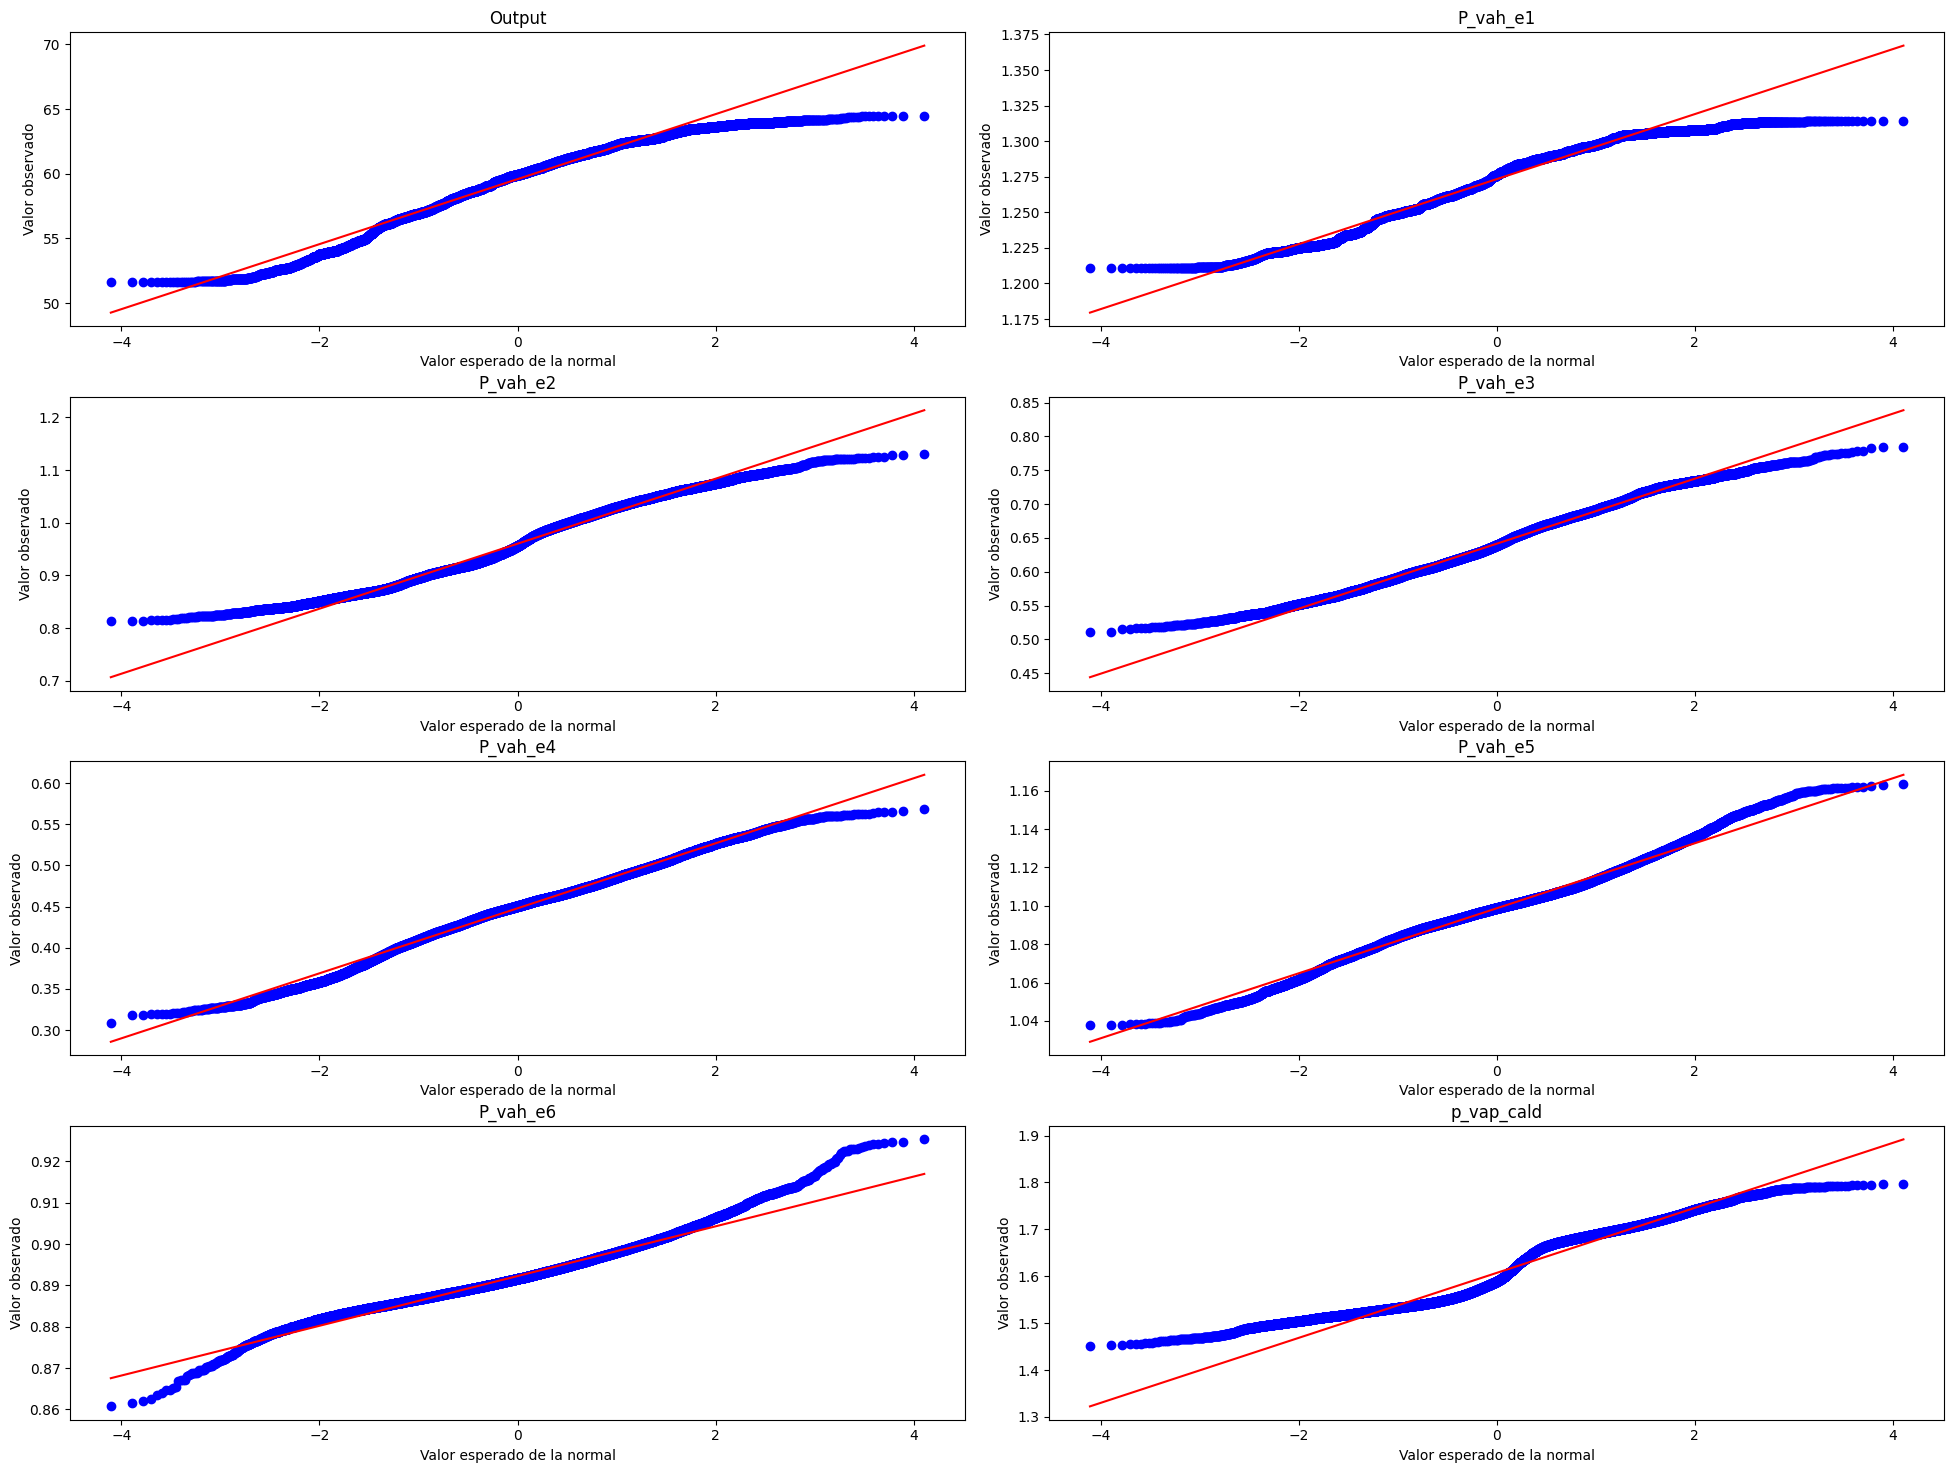

In [4]:
import math
import matplotlib.pyplot as plt
import scipy.stats as stats

# presiones

data = dataFile.loc[:,['Output','P_vah_e1','P_vah_e2','P_vah_e3','P_vah_e4','P_vah_e5','P_vah_e6','p_vap_cald']]

nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
fig, axs = plt.subplots(nRowsG, ncolumnsG, figsize=(20,15))
fig.tight_layout(pad=3.0)

for index, column in enumerate(data.columns):
    stats.probplot(data[column], dist="norm", plot=axs[index // ncolumnsG, index % ncolumnsG])
    axs[index // ncolumnsG, index % ncolumnsG].set_title(column)
    axs[index // ncolumnsG, index % ncolumnsG].set_xlabel('Valor esperado de la normal')
    axs[index // ncolumnsG, index % ncolumnsG].set_ylabel('Valor observado')

plt.show()

TEMPERATURAS DEL VAPOR

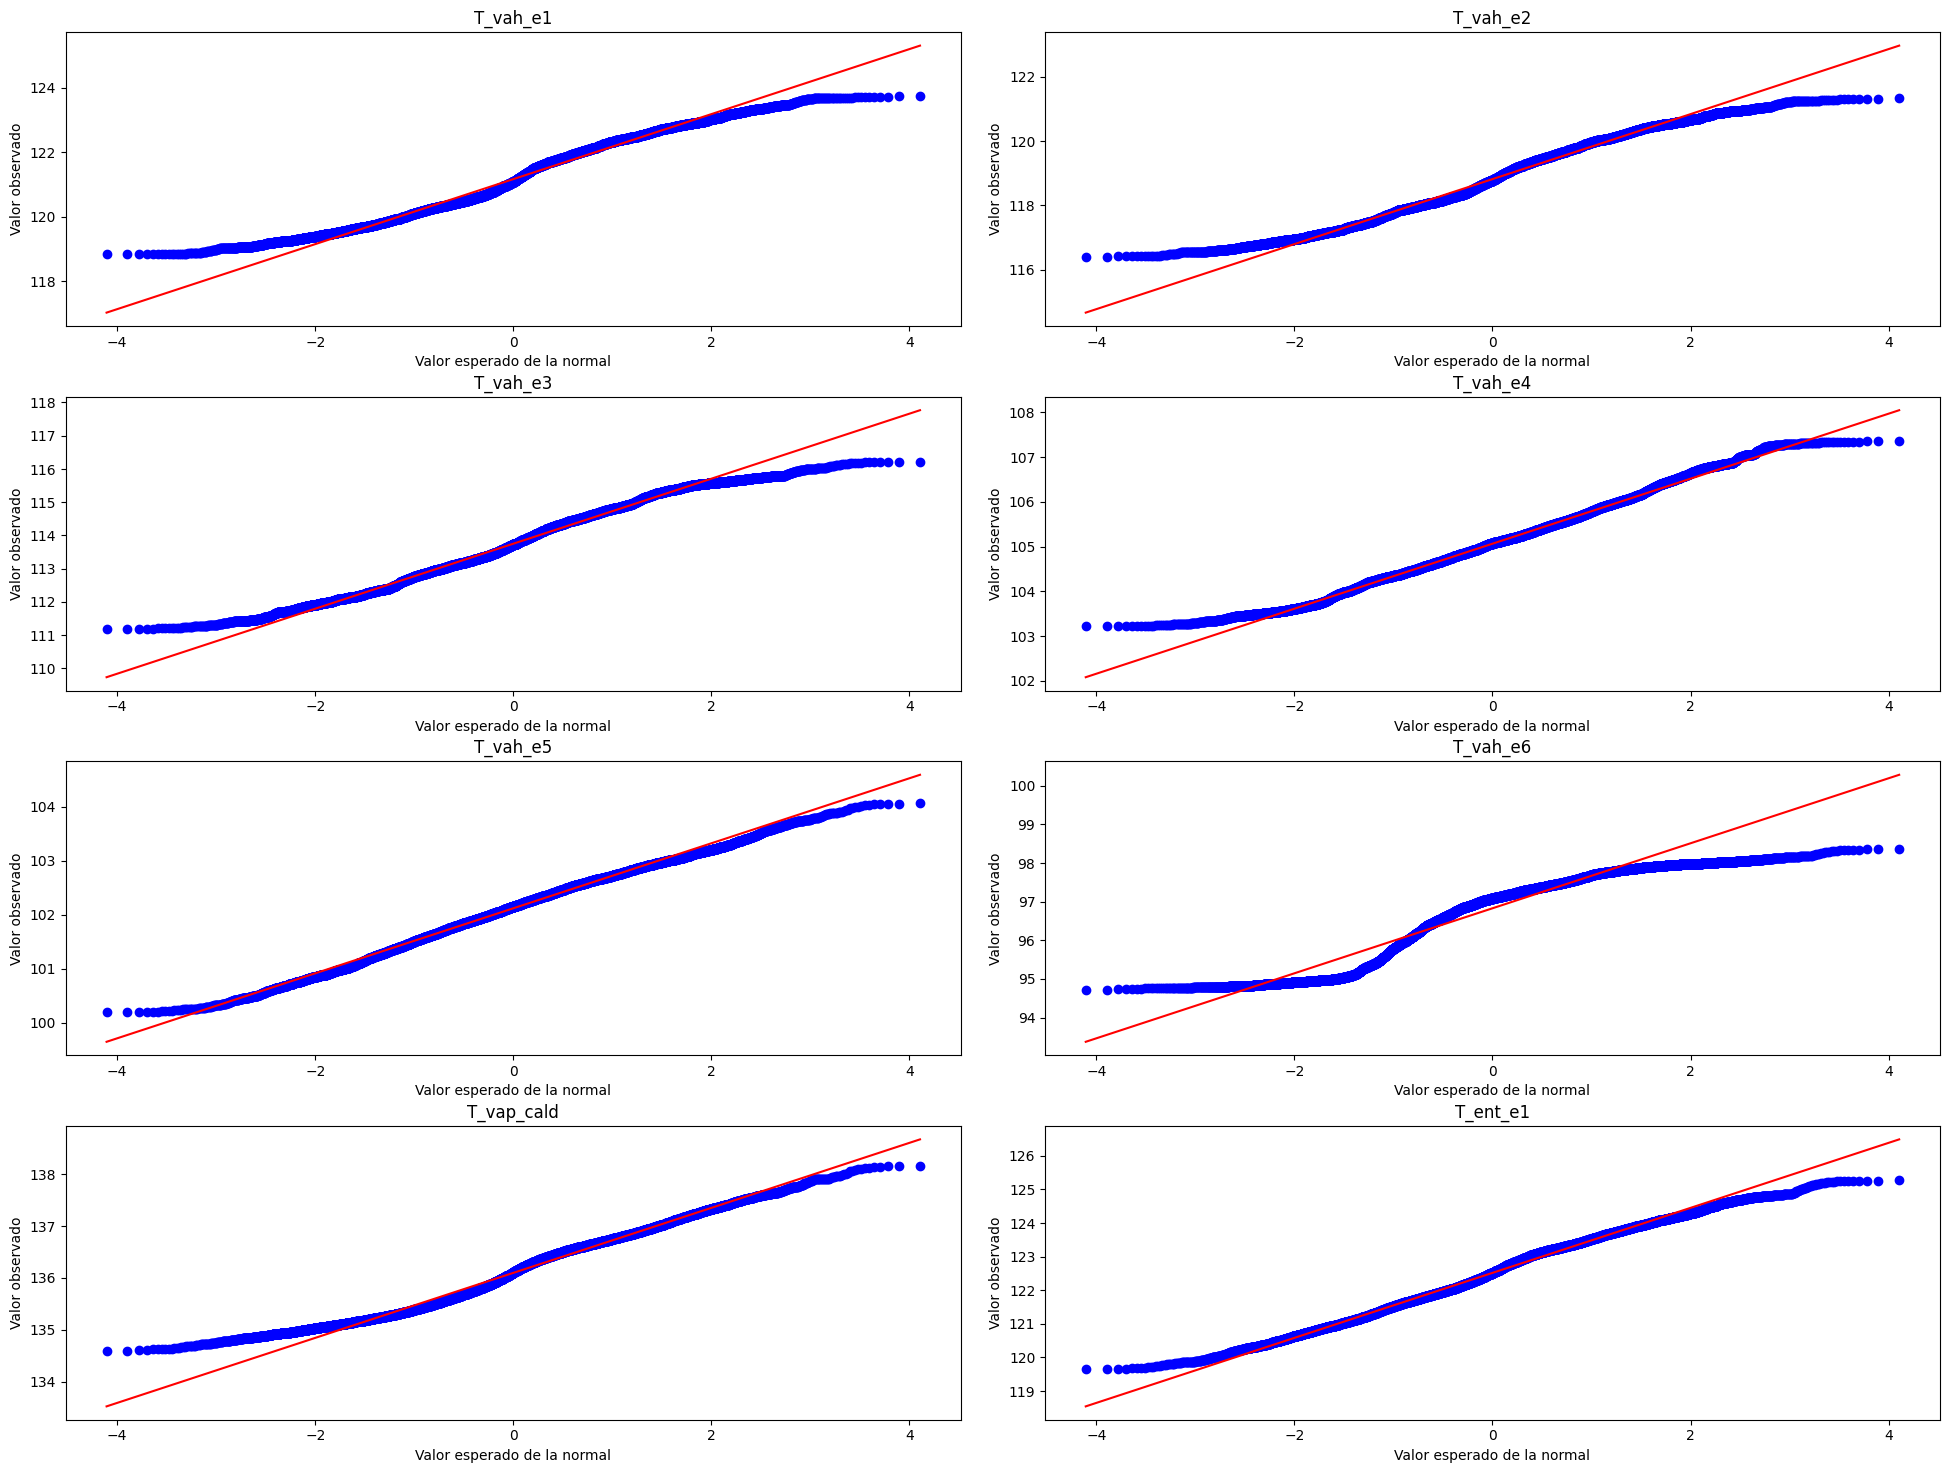

In [5]:
import math
import matplotlib.pyplot as plt
import scipy.stats as stats

# presiones

data = dataFile.loc[:,['T_vah_e1', 'T_vah_e2', 'T_vah_e3',
       'T_vah_e4', 'T_vah_e5', 'T_vah_e6', 'T_vap_cald','T_ent_e1']]

nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
fig, axs = plt.subplots(nRowsG, ncolumnsG, figsize=(20,15))
fig.tight_layout(pad=3.0)

for index, column in enumerate(data.columns):
    stats.probplot(data[column], dist="norm", plot=axs[index // ncolumnsG, index % ncolumnsG])
    axs[index // ncolumnsG, index % ncolumnsG].set_title(column)
    axs[index // ncolumnsG, index % ncolumnsG].set_xlabel('Valor esperado de la normal')
    axs[index // ncolumnsG, index % ncolumnsG].set_ylabel('Valor observado')

plt.show()

TEMPERATURAS DEL JUGO

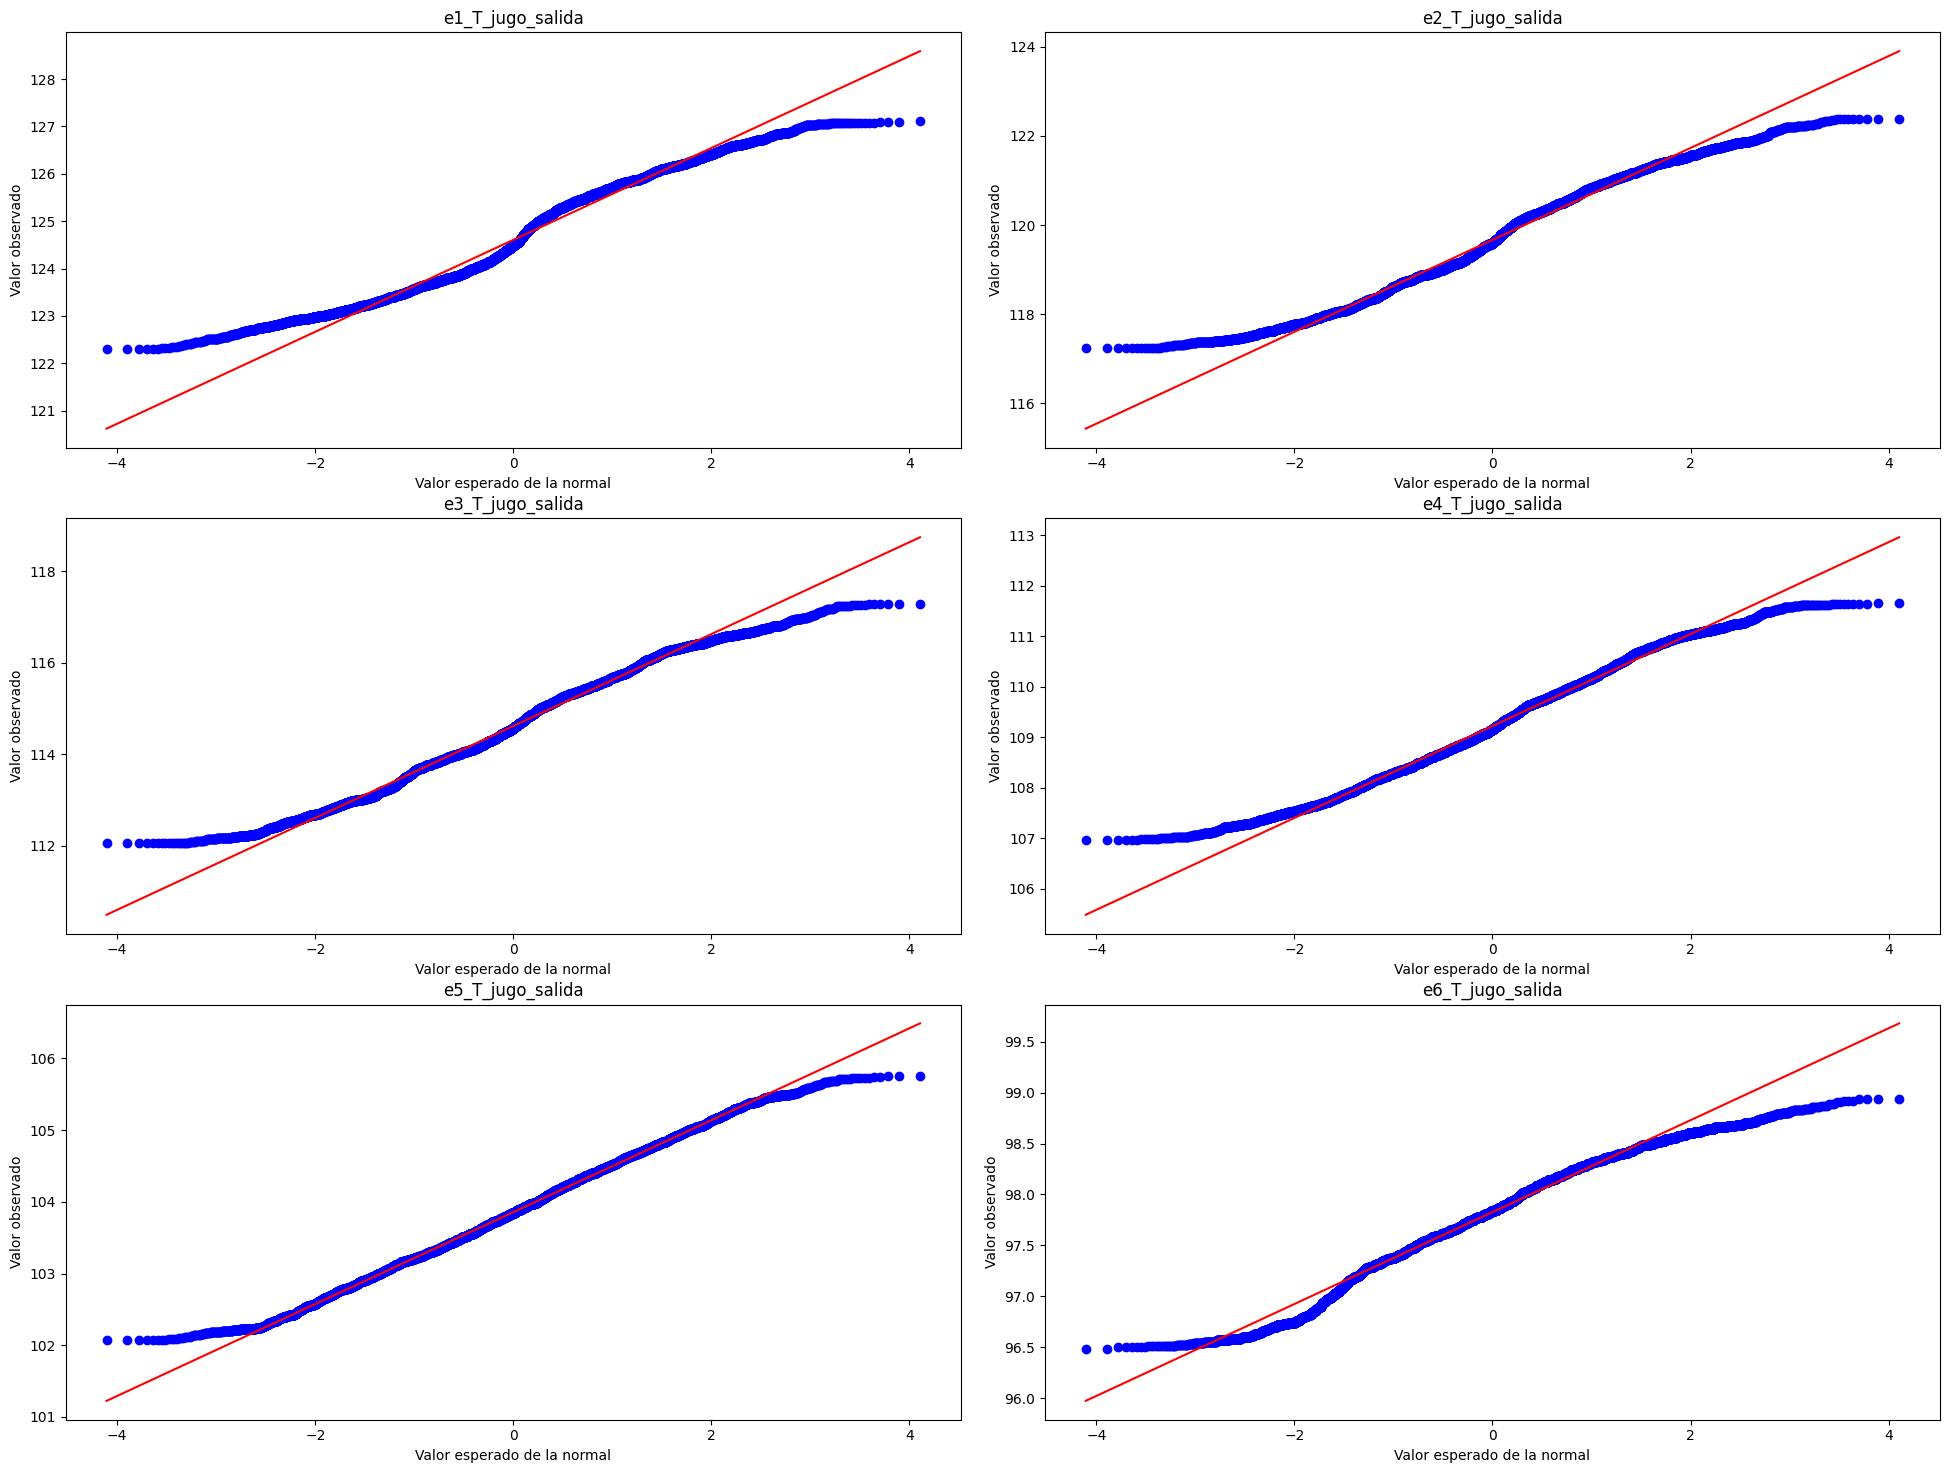

In [6]:
import math
import matplotlib.pyplot as plt
import scipy.stats as stats

# presiones

data =  dataFile.loc[:,['e1_T_jugo_salida',
'e2_T_jugo_salida', 'e3_T_jugo_salida', 'e4_T_jugo_salida',
'e5_T_jugo_salida', 'e6_T_jugo_salida']]


nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
fig, axs = plt.subplots(nRowsG, ncolumnsG, figsize=(20,15))
fig.tight_layout(pad=3.0)

for index, column in enumerate(data.columns):
    stats.probplot(data[column], dist="norm", plot=axs[index // ncolumnsG, index % ncolumnsG])
    axs[index // ncolumnsG, index % ncolumnsG].set_title(column)
    axs[index // ncolumnsG, index % ncolumnsG].set_xlabel('Valor esperado de la normal')
    axs[index // ncolumnsG, index % ncolumnsG].set_ylabel('Valor observado')

plt.show()

TEMPERATURA CAMBIADORES DE CALOR

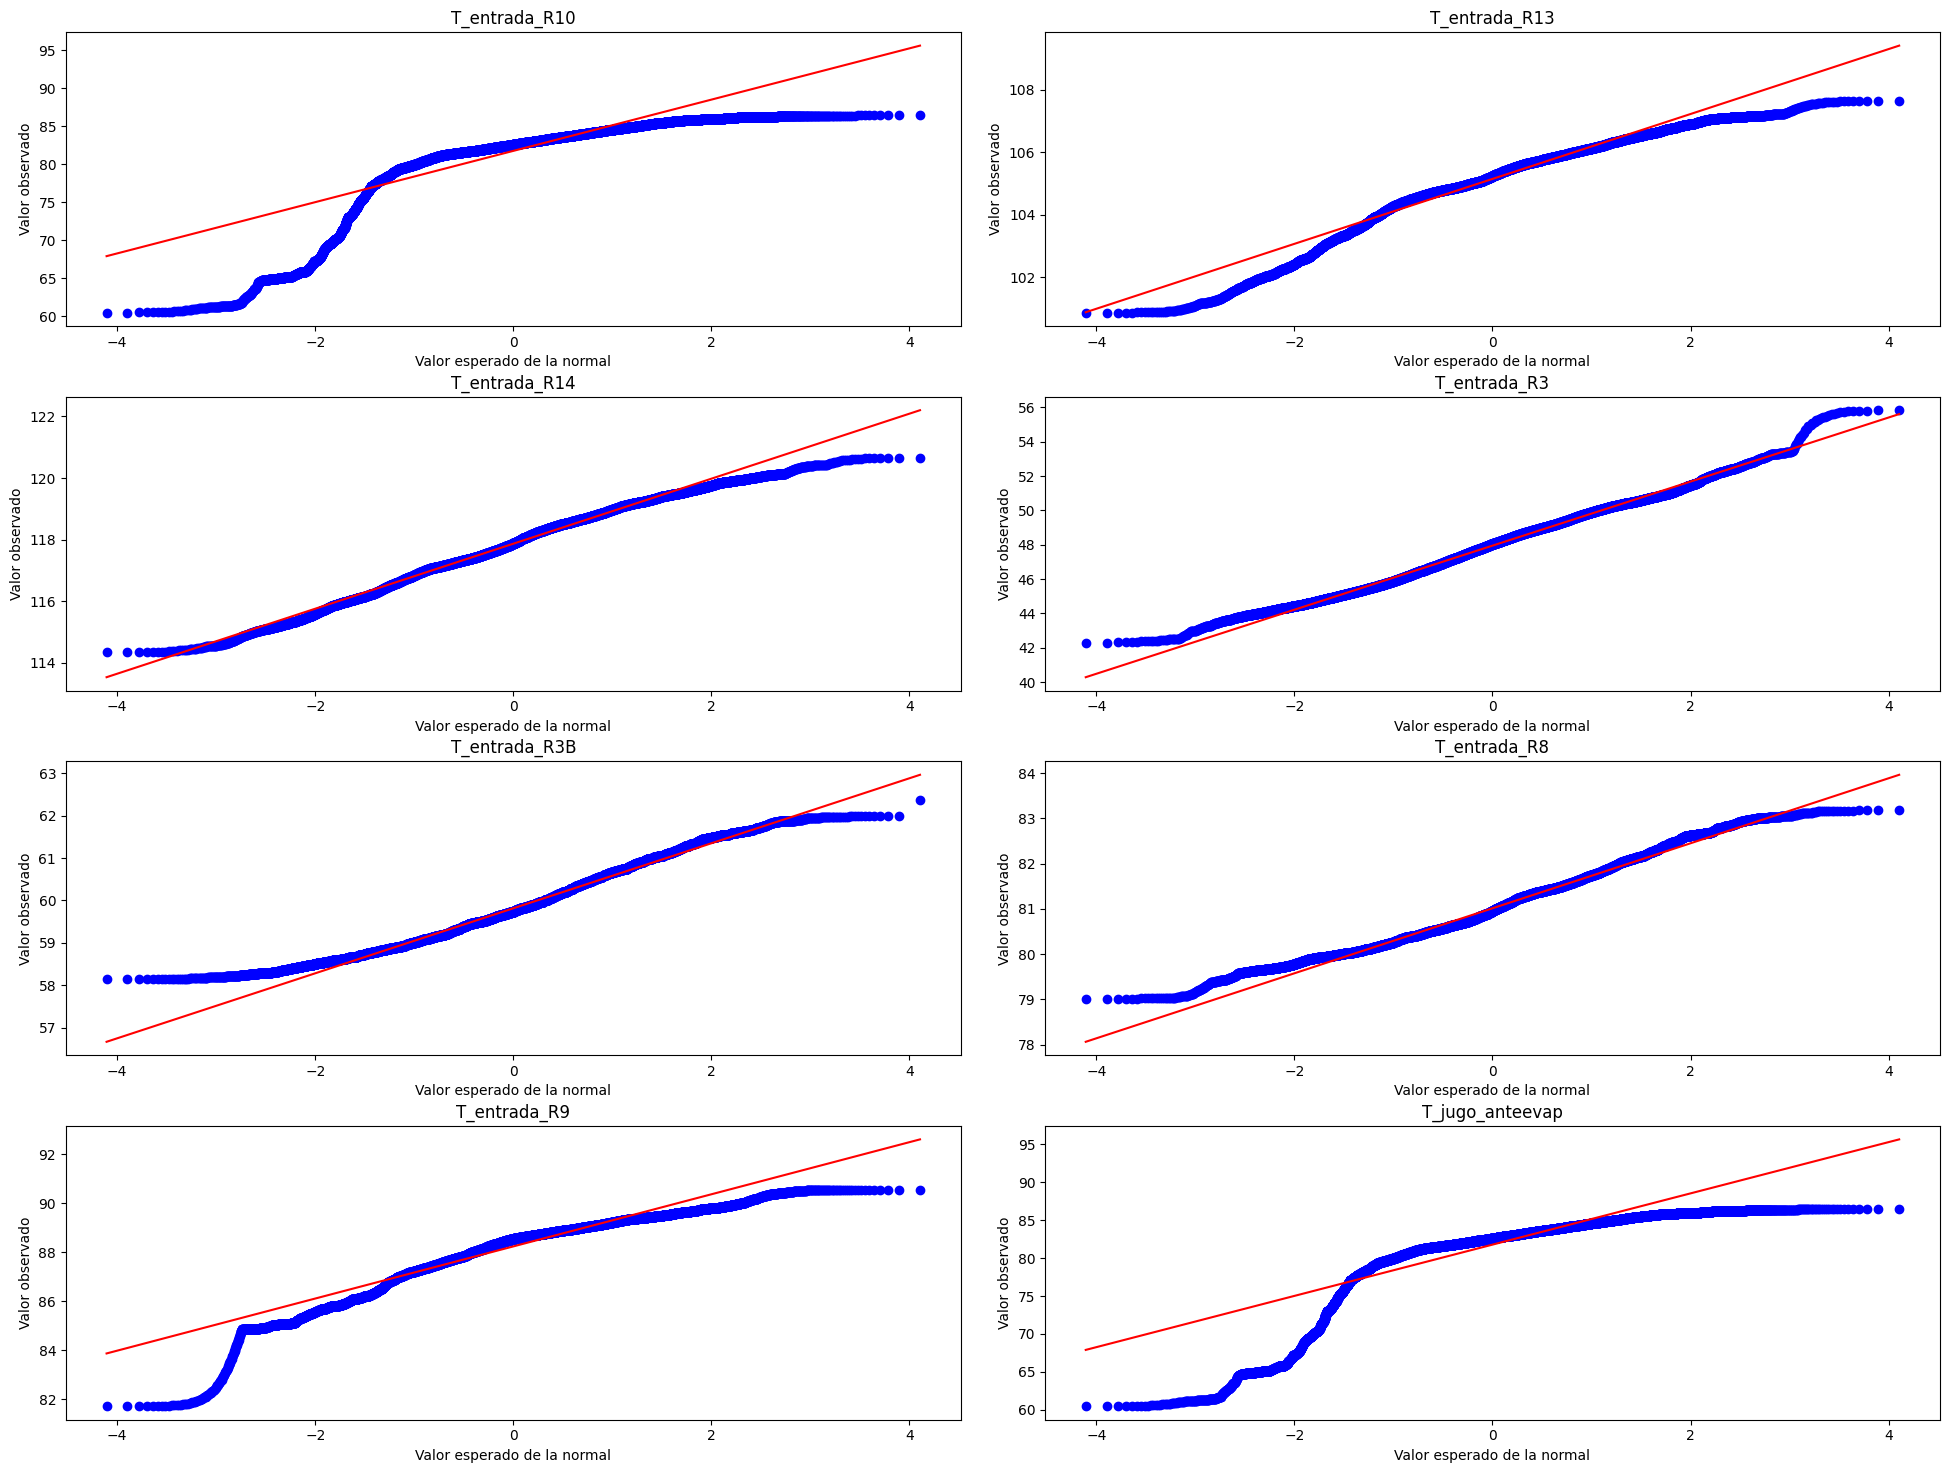

In [7]:
import math
import matplotlib.pyplot as plt
import scipy.stats as stats

# presiones


data = dataFile.loc[:,['T_entrada_R10', 'T_entrada_R13',
       'T_entrada_R14', 'T_entrada_R3', 'T_entrada_R3B', 'T_entrada_R8',
       'T_entrada_R9', 'T_jugo_anteevap']]


nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
fig, axs = plt.subplots(nRowsG, ncolumnsG, figsize=(20,15))
fig.tight_layout(pad=3.0)

for index, column in enumerate(data.columns):
    stats.probplot(data[column], dist="norm", plot=axs[index // ncolumnsG, index % ncolumnsG])
    axs[index // ncolumnsG, index % ncolumnsG].set_title(column)
    axs[index // ncolumnsG, index % ncolumnsG].set_xlabel('Valor esperado de la normal')
    axs[index // ncolumnsG, index % ncolumnsG].set_ylabel('Valor observado')

plt.show()

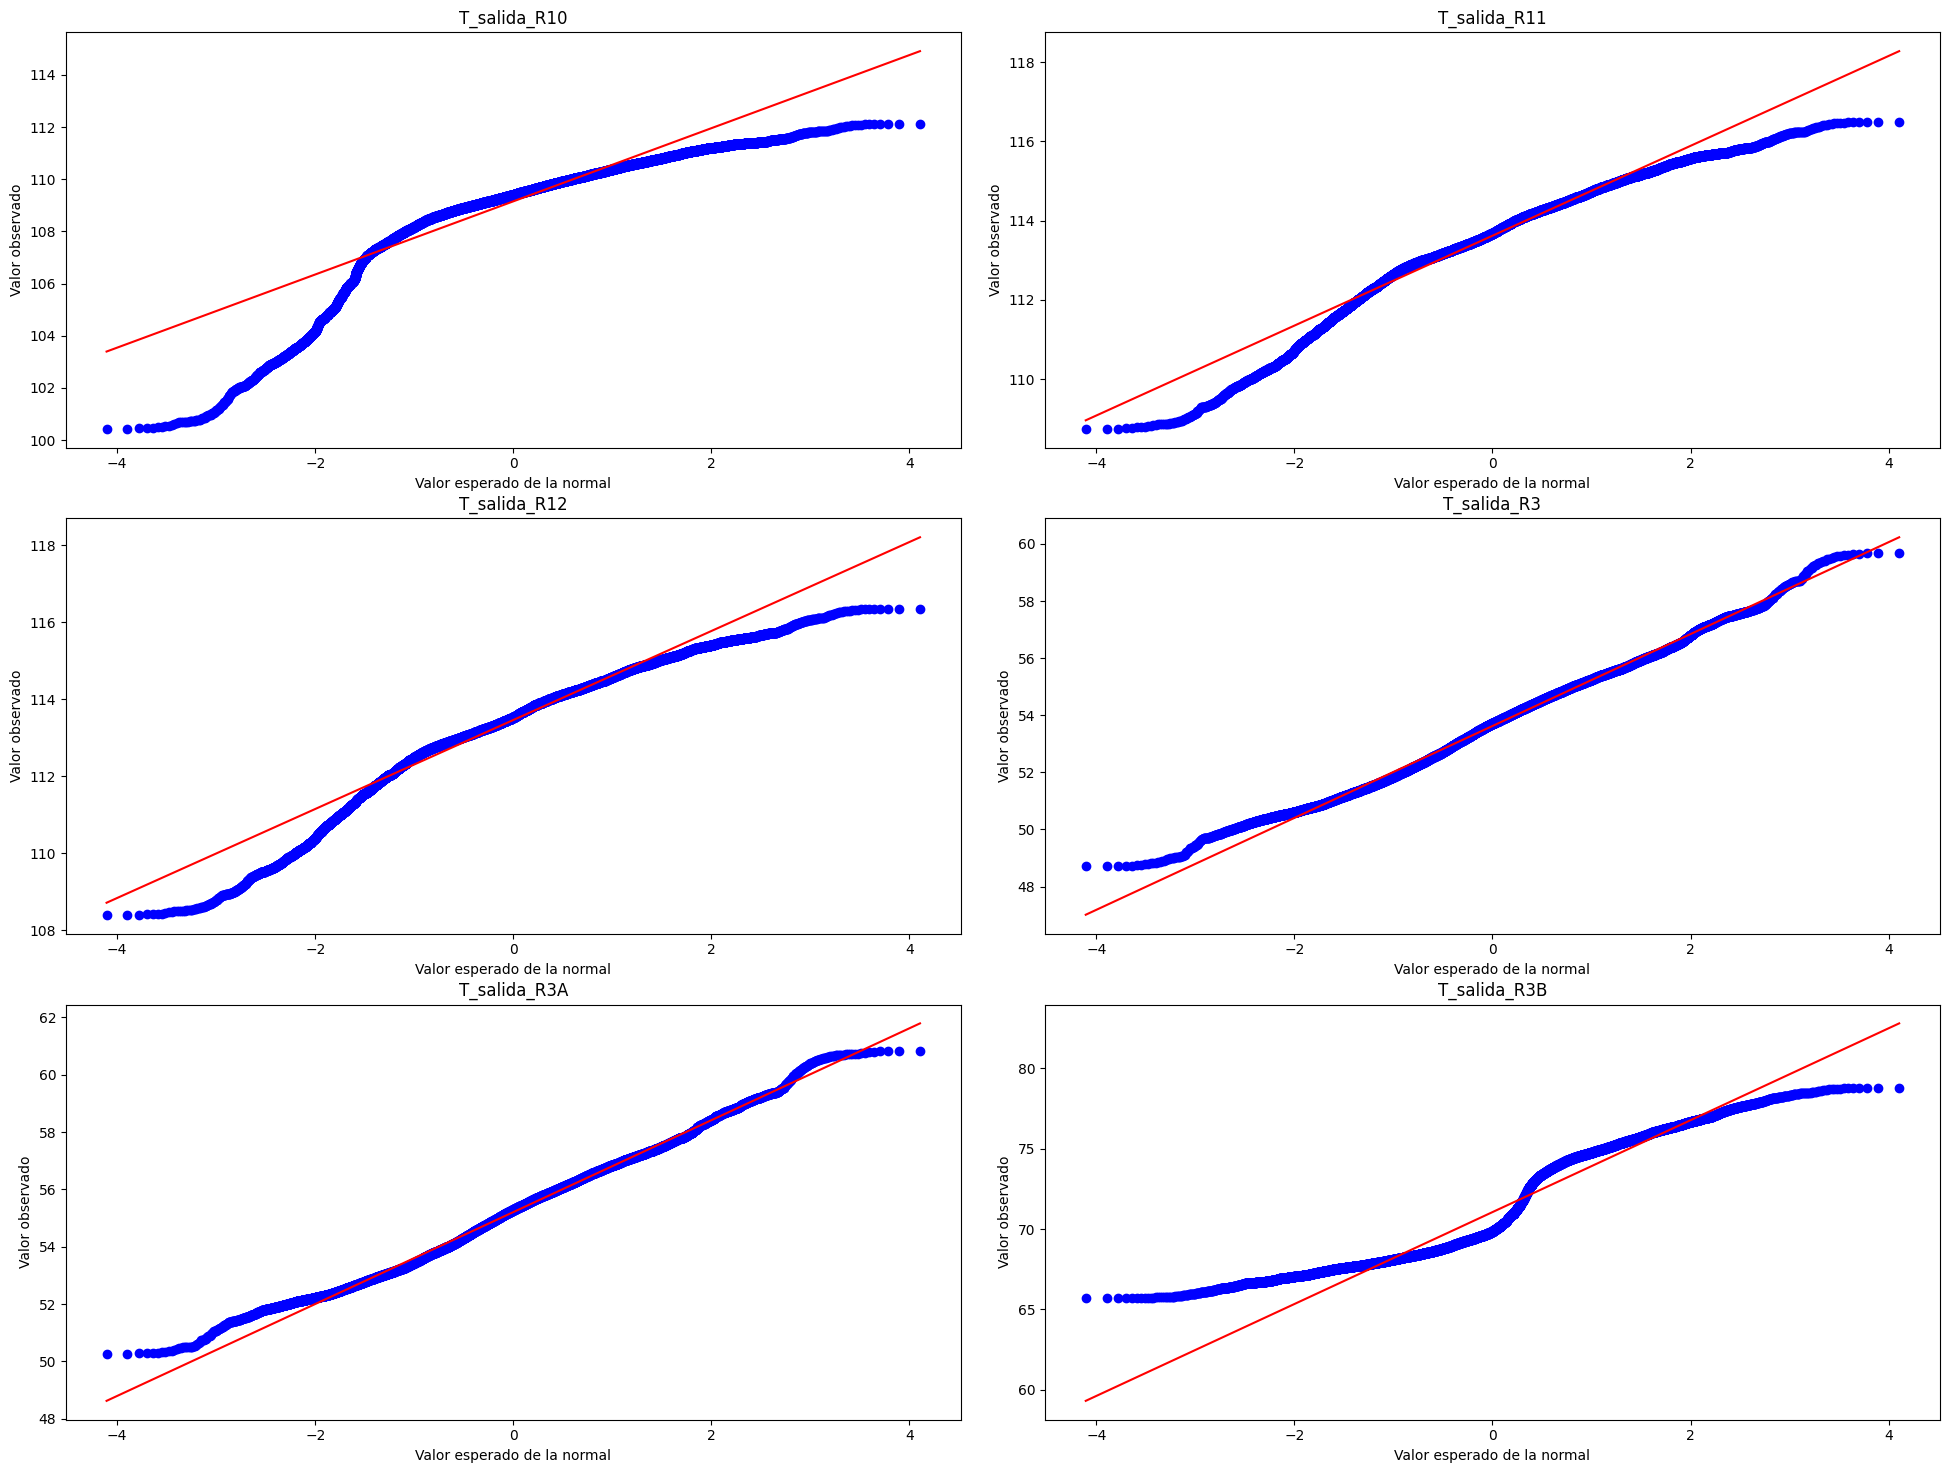

In [8]:
import math
import matplotlib.pyplot as plt
import scipy.stats as stats

# presiones


data = dataFile.loc[:,[ 'T_salida_R10', 'T_salida_R11',
       'T_salida_R12', 'T_salida_R3', 'T_salida_R3A', 'T_salida_R3B']]



nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
fig, axs = plt.subplots(nRowsG, ncolumnsG, figsize=(20,15))
fig.tight_layout(pad=3.0)

for index, column in enumerate(data.columns):
    stats.probplot(data[column], dist="norm", plot=axs[index // ncolumnsG, index % ncolumnsG])
    axs[index // ncolumnsG, index % ncolumnsG].set_title(column)
    axs[index // ncolumnsG, index % ncolumnsG].set_xlabel('Valor esperado de la normal')
    axs[index // ncolumnsG, index % ncolumnsG].set_ylabel('Valor observado')

plt.show()

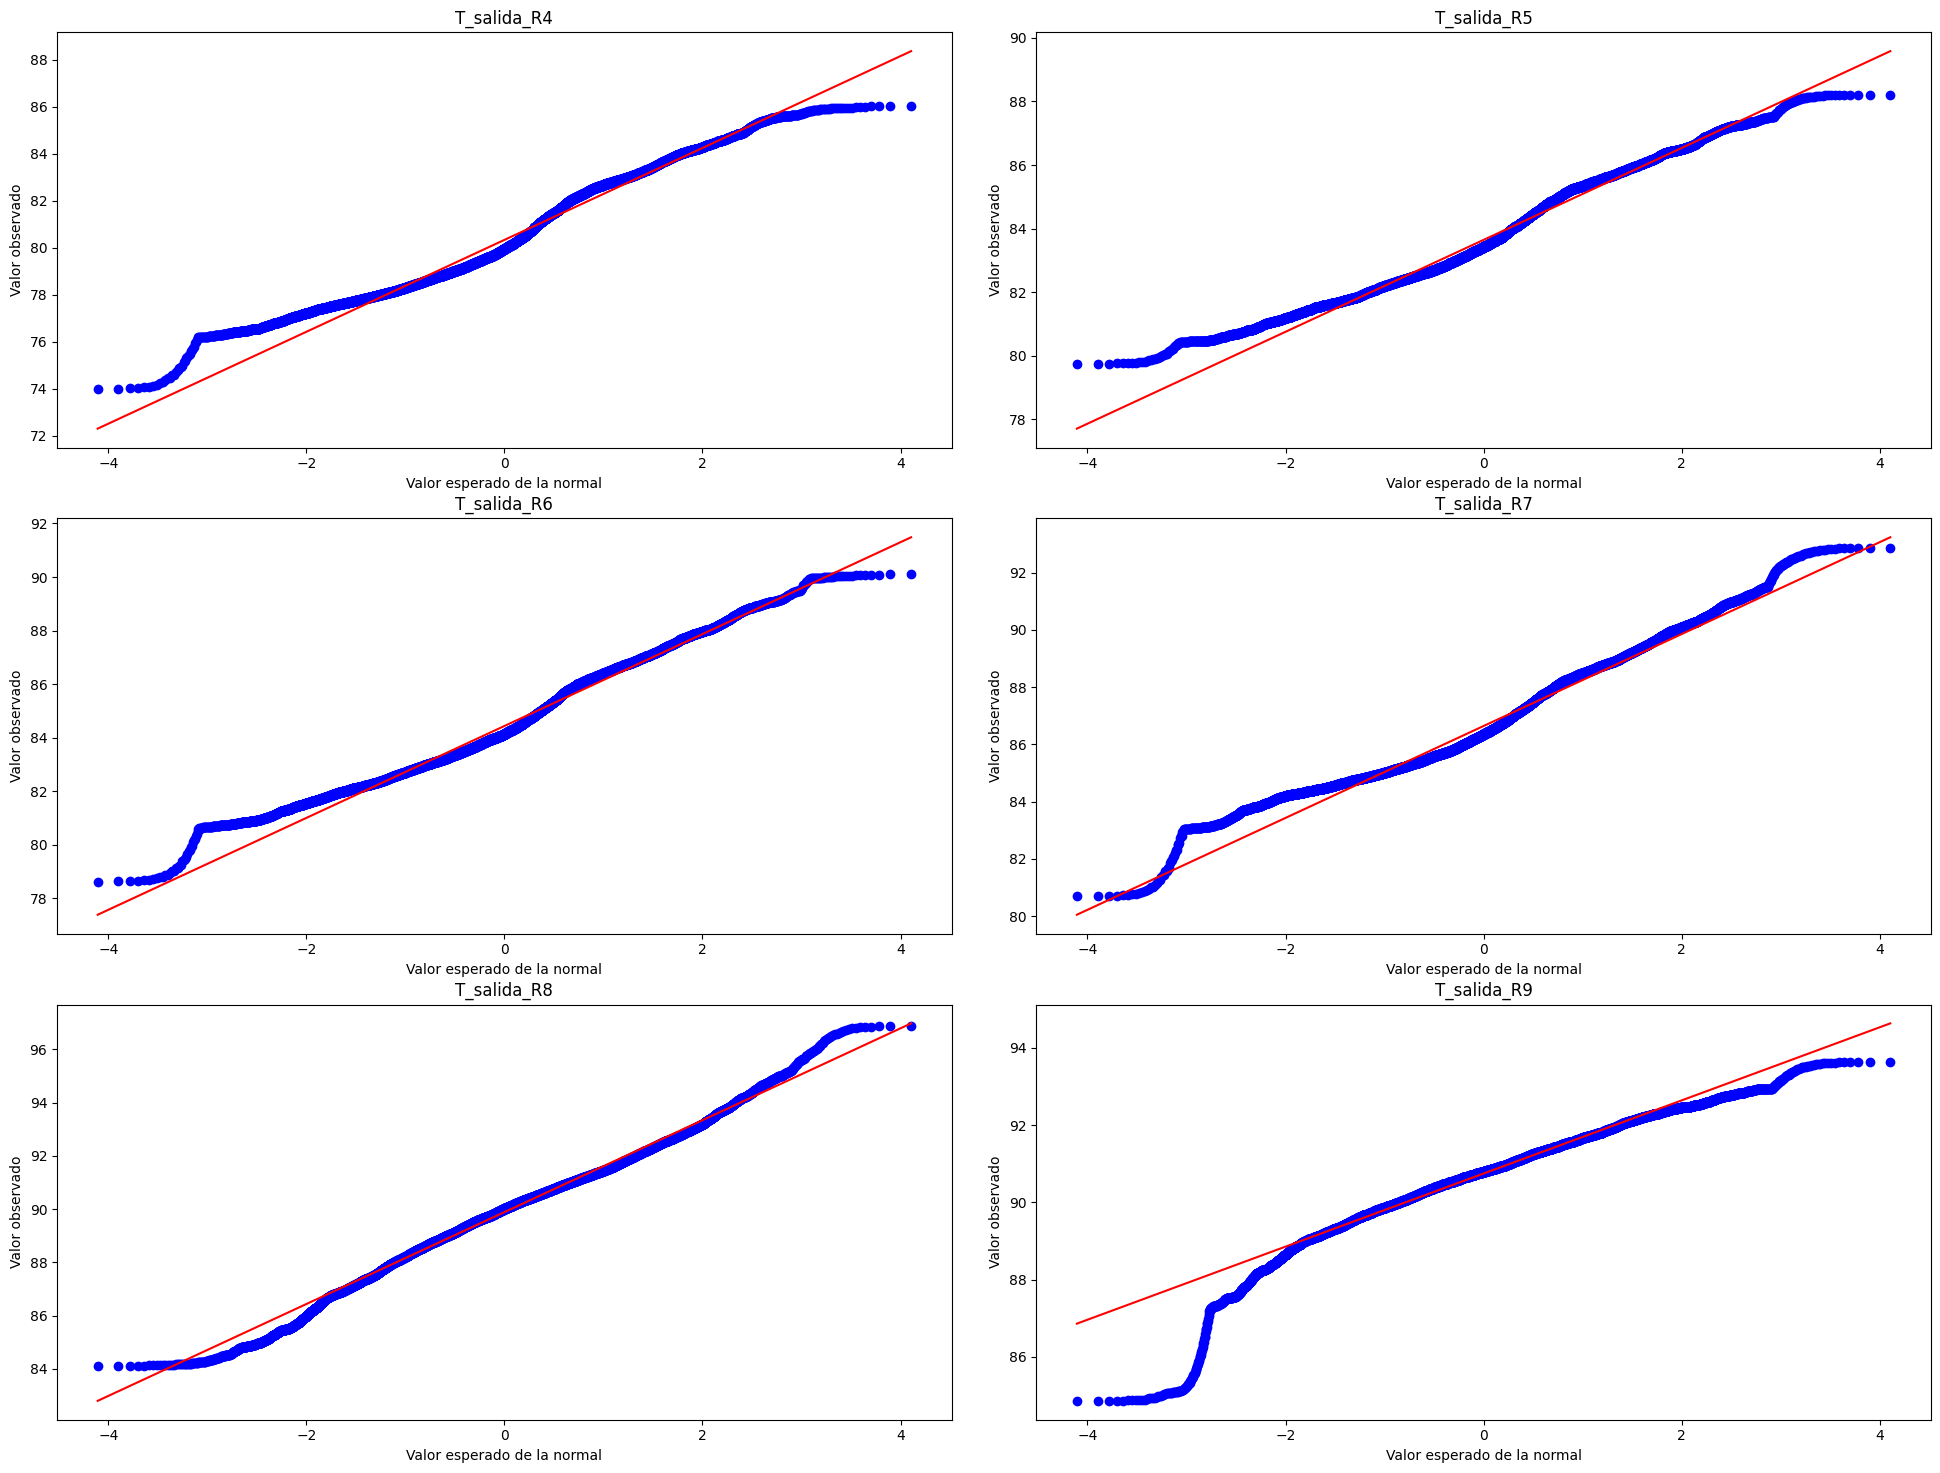

In [9]:
import math
import matplotlib.pyplot as plt
import scipy.stats as stats

# presiones


data = dataFile.loc[:,[
       'T_salida_R4', 'T_salida_R5', 'T_salida_R6', 'T_salida_R7',
       'T_salida_R8', 'T_salida_R9']]


nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
fig, axs = plt.subplots(nRowsG, ncolumnsG, figsize=(20,15))
fig.tight_layout(pad=3.0)

for index, column in enumerate(data.columns):
    stats.probplot(data[column], dist="norm", plot=axs[index // ncolumnsG, index % ncolumnsG])
    axs[index // ncolumnsG, index % ncolumnsG].set_title(column)
    axs[index // ncolumnsG, index % ncolumnsG].set_xlabel('Valor esperado de la normal')
    axs[index // ncolumnsG, index % ncolumnsG].set_ylabel('Valor observado')

plt.show()

FLUJOS MASICOS

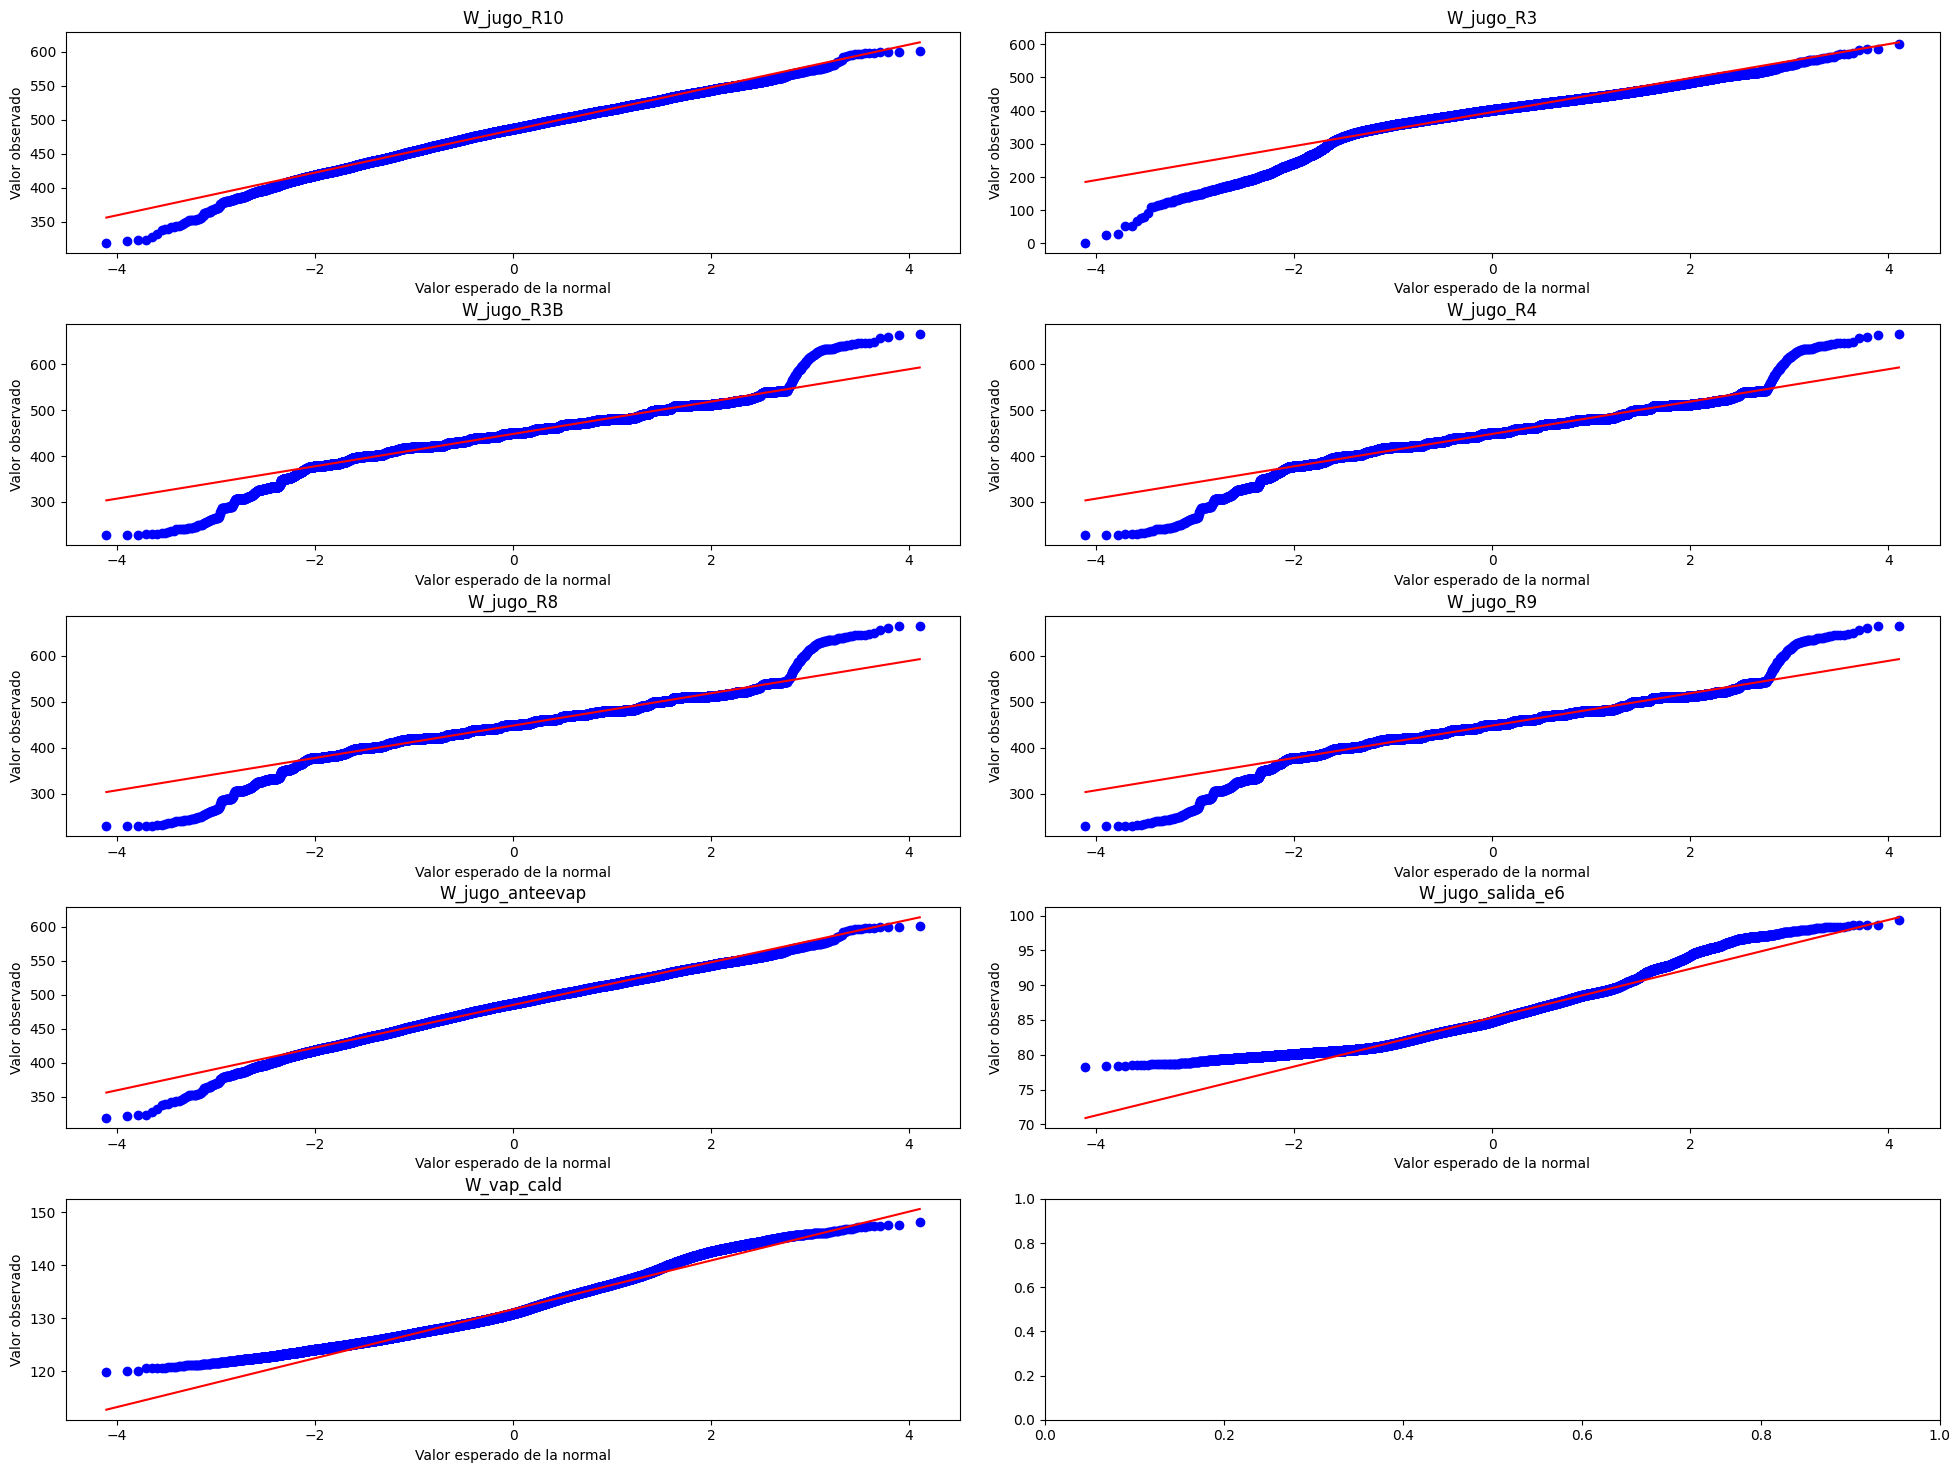

In [10]:
import math
import matplotlib.pyplot as plt
import scipy.stats as stats

# presiones
data =  dataFile.loc[:,['W_jugo_R10', 'W_jugo_R3', 'W_jugo_R3B', 'W_jugo_R4', 'W_jugo_R8', 'W_jugo_R9', 'W_jugo_anteevap', 'W_jugo_salida_e6', 'W_vap_cald']]

nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
fig, axs = plt.subplots(nRowsG, ncolumnsG, figsize=(20,15))
fig.tight_layout(pad=3.0)

for index, column in enumerate(data.columns):
    stats.probplot(data[column], dist="norm", plot=axs[index // ncolumnsG, index % ncolumnsG])
    axs[index // ncolumnsG, index % ncolumnsG].set_title(column)
    axs[index // ncolumnsG, index % ncolumnsG].set_xlabel('Valor esperado de la normal')
    axs[index // ncolumnsG, index % ncolumnsG].set_ylabel('Valor observado')

plt.show()


